In [5]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load data

In [6]:
df = pd.read_csv('./data/laptops.csv', index_col = [0])

In [7]:
df

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
979,https://rukminim1.flixcart.com/image/312/312/k...,ASUS VivoBook 15 Core i3 10th Gen,37990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,15.6,4.0,1907.0,227.0
980,https://rukminim1.flixcart.com/image/312/312/k...,HP Chromebook MediaTek Kompanio 500,22670,MediaTek MediaTek Kompanio 500 Processor,4 GB LPDDR4X RAM,Chrome Operating System,1 TB HDD,11.6,3.8,5991.0,687.0
981,https://rukminim1.flixcart.com/image/312/312/x...,ASUS Ryzen 5 Hexa Core,54990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,14.0,4.5,22.0,5.0
982,https://rukminim1.flixcart.com/image/312/312/k...,DELL Inspiron Core i3 11th Gen,40990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.0,801.0,104.0


In [8]:
df.columns

Index(['img_link', 'name', 'price(in Rs.)', 'processor', 'ram', 'os',
       'storage', 'display(in inch)', 'rating', 'no_of_ratings',
       'no_of_reviews'],
      dtype='object')

## select using columns

In [9]:
df.columns.values.tolist()

['img_link',
 'name',
 'price(in Rs.)',
 'processor',
 'ram',
 'os',
 'storage',
 'display(in inch)',
 'rating',
 'no_of_ratings',
 'no_of_reviews']

In [10]:
columns = df.columns.values.tolist()

## split data set about null value

In [11]:
test_df = df[df['rating'].isnull()==True]

In [12]:
test_df.isnull().any()

img_link            False
name                False
price(in Rs.)       False
processor           False
ram                 False
os                  False
storage             False
display(in inch)    False
rating               True
no_of_ratings        True
no_of_reviews        True
dtype: bool

In [13]:
training_df = df[df['rating'].isnull()==False]

In [14]:
training_df.isnull().any()

img_link            False
name                False
price(in Rs.)       False
processor           False
ram                 False
os                  False
storage             False
display(in inch)    False
rating              False
no_of_ratings       False
no_of_reviews       False
dtype: bool

In [15]:
training_df

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
978,https://rukminim1.flixcart.com/image/312/312/k...,ASUS Chromebook Celeron Dual Core,21990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,512 GB SSD,14.0,3.8,1135.0,167.0
979,https://rukminim1.flixcart.com/image/312/312/k...,ASUS VivoBook 15 Core i3 10th Gen,37990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,15.6,4.0,1907.0,227.0
980,https://rukminim1.flixcart.com/image/312/312/k...,HP Chromebook MediaTek Kompanio 500,22670,MediaTek MediaTek Kompanio 500 Processor,4 GB LPDDR4X RAM,Chrome Operating System,1 TB HDD,11.6,3.8,5991.0,687.0
981,https://rukminim1.flixcart.com/image/312/312/x...,ASUS Ryzen 5 Hexa Core,54990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,14.0,4.5,22.0,5.0


In [16]:
training_df.columns

Index(['img_link', 'name', 'price(in Rs.)', 'processor', 'ram', 'os',
       'storage', 'display(in inch)', 'rating', 'no_of_ratings',
       'no_of_reviews'],
      dtype='object')

# preprocess input data for apply model

## making columns to split about sparse & dense

In [17]:
training_df_sparse = ['img_link','name','processor','ram','os','storage']
training_df_dense = ['price(in Rs.)','display(in inch)']

## apply minmax scaler for input data 

In [18]:
mms = MinMaxScaler(feature_range=(0, 1))

In [19]:
training_df[training_df_dense] = mms.fit_transform(training_df[training_df_dense])

C:\Users\user\AppData\Local\Temp\ipykernel_11580\808240745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[training_df_dense] = mms.fit_transform(training_df[training_df_dense])


In [20]:
for feat in training_df_sparse:
    print(feat)

img_link
name
processor
ram
os
storage


## apply label encoder for input data

In [21]:
for feat in training_df_sparse:
        lbe = LabelEncoder()
        training_df[feat] = lbe.fit_transform(training_df[feat])

C:\Users\user\AppData\Local\Temp\ipykernel_11580\4155912046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df[feat] = lbe.fit_transform(training_df[feat])


In [22]:
training_df

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,292,271,0.142684,26,1,10,12,0.170940,4.5,14.0,1.0
1,320,277,0.065301,22,15,4,2,0.170940,4.4,53.0,3.0
2,242,56,0.103218,25,15,10,12,0.170940,4.4,4733.0,463.0
3,322,72,0.054645,21,15,4,12,0.170940,4.3,10406.0,1040.0
4,328,234,0.009107,1,11,7,10,0.102564,3.8,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
978,100,11,0.018215,18,12,6,12,0.102564,3.8,1135.0,167.0
979,89,73,0.066788,21,15,3,0,0.170940,4.0,1907.0,227.0
980,104,187,0.020279,45,13,6,0,0.000000,3.8,5991.0,687.0
981,300,42,0.118397,6,15,10,12,0.102564,4.5,22.0,5.0


# model part

In [23]:
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from deepctr.models import DeepFM

## making inputs for model
---
+ fixlen_feature_columns : making linear_feature_columns & dnn_feature_columns
+ linear_feature_columns : making feature_columns & apply deepfm model
+ dnn_feature_columns : making feature_columns & apply deepfm model
+ feature_names : making input for apply model

In [24]:
fixlen_feature_columns = [SparseFeat(feat, training_df[feat].max() + 1, embedding_dim=4) for feat in training_df_sparse] + [DenseFeat(feat, 1, ) for feat in training_df_dense]

In [25]:
fixlen_feature_columns

[SparseFeat(name='img_link', vocabulary_size=401, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x0000025B28C82E50>, embedding_name='img_link', group_name='default_group', trainable=True),
 SparseFeat(name='name', vocabulary_size=357, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x0000025B28C82970>, embedding_name='name', group_name='default_group', trainable=True),
 SparseFeat(name='processor', vocabulary_size=47, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x0000025B28C82700>, embedding_name='processor', group_name='default_group', trainable=True),
 SparseFeat(name='ram', vocabulary_size=20, embedding_dim=4, use_has

In [26]:
dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

In [27]:
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

In [28]:
train, test = train_test_split(training_df, test_size=0.2, random_state=2020)
train_model_input = {name: train[name] for name in feature_names}
test_model_input = {name: test[name] for name in feature_names}

In [29]:
feature_names

['img_link',
 'name',
 'processor',
 'ram',
 'os',
 'storage',
 'price(in Rs.)',
 'display(in inch)']

In [30]:
test

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
749,48,248,0.036430,2,11,4,10,0.102564,4.1,114.0,15.0
389,234,110,0.209472,35,1,4,12,0.102564,3.9,45.0,9.0
569,96,168,0.094414,7,15,3,12,0.102564,4.4,17.0,2.0
36,195,315,0.051609,46,13,10,12,0.102564,4.2,109.0,18.0
750,151,209,0.145750,6,15,4,12,0.170940,3.9,70.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
343,292,271,0.112022,26,1,10,12,0.170940,4.5,14.0,1.0
684,53,24,0.141166,25,15,3,0,0.102564,3.9,10.0,0.0
344,41,111,0.075896,22,15,4,12,0.102564,4.3,389.0,44.0
873,325,271,0.158774,26,1,10,12,0.170940,4.1,8.0,0.0


In [31]:
DEFAULT_GROUP_NAME = "default_group"

In [32]:
model = DeepFM(linear_feature_columns, dnn_feature_columns, fm_group=(DEFAULT_GROUP_NAME,), dnn_hidden_units=(256, 128, 64),
           l2_reg_linear=0.00001, l2_reg_embedding=0.00001, l2_reg_dnn=0, seed=1024, dnn_dropout=0,
           dnn_activation='relu', dnn_use_bn=False, task='regression')

In [33]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_link (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
name (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
processor (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
ram (InputLayer)                [(None, 1)]          0                                            
______________________________________________________________________________________________

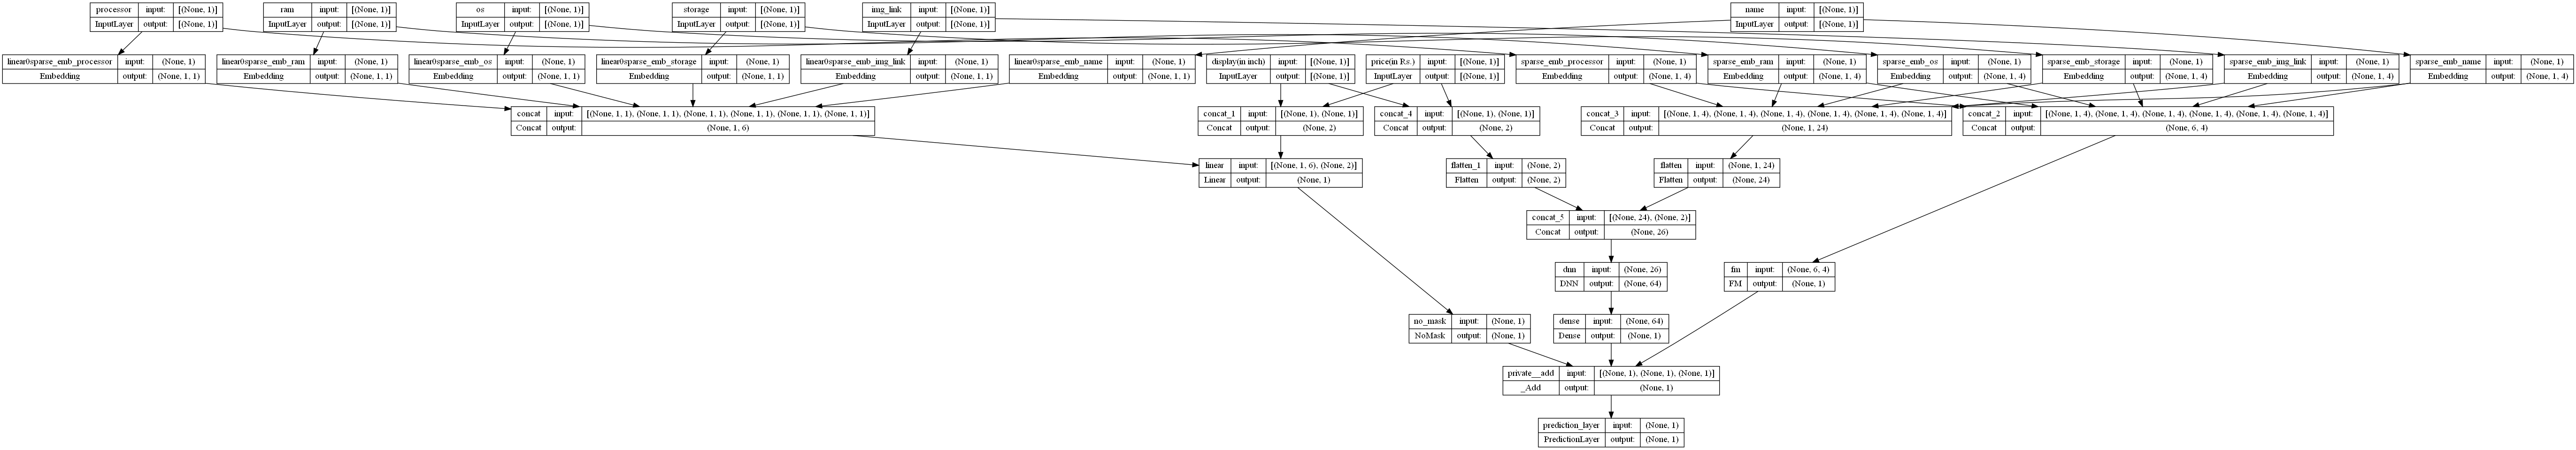

In [35]:
from tensorflow import keras
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)


In [36]:
fixlen_feature_columns

[SparseFeat(name='img_link', vocabulary_size=401, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x0000025B28C82E50>, embedding_name='img_link', group_name='default_group', trainable=True),
 SparseFeat(name='name', vocabulary_size=357, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x0000025B28C82970>, embedding_name='name', group_name='default_group', trainable=True),
 SparseFeat(name='processor', vocabulary_size=47, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x0000025B28C82700>, embedding_name='processor', group_name='default_group', trainable=True),
 SparseFeat(name='ram', vocabulary_size=20, embedding_dim=4, use_has

In [63]:
train_model_input

{'img_link': 10     369
 702     34
 261    186
 655    320
 78     351
       ... 
 904     35
 102    267
 891    292
 402    230
 509    109
 Name: img_link, Length: 550, dtype: int32,
 'name': 10     322
 702    305
 261    176
 655    277
 78     100
       ... 
 904    294
 102      6
 891    271
 402    125
 509    327
 Name: name, Length: 550, dtype: int32,
 'processor': 10      3
 702    33
 261    22
 655    22
 78      6
        ..
 904    38
 102    17
 891    26
 402    18
 509     6
 Name: processor, Length: 550, dtype: int32,
 'ram': 10     15
 702     1
 261    15
 655    15
 78      1
        ..
 904    15
 102    19
 891     1
 402    11
 509    15
 Name: ram, Length: 550, dtype: int32,
 'os': 10      4
 702     3
 261     4
 655     4
 78      4
        ..
 904     3
 102     8
 891    10
 402     4
 509     3
 Name: os, Length: 550, dtype: int32,
 'storage': 10     10
 702    12
 261    10
 655     2
 78     12
        ..
 904    12
 102    10
 891    12
 402     5


In [64]:
train_model_input

{'img_link': 10     369
 702     34
 261    186
 655    320
 78     351
       ... 
 904     35
 102    267
 891    292
 402    230
 509    109
 Name: img_link, Length: 550, dtype: int32,
 'name': 10     322
 702    305
 261    176
 655    277
 78     100
       ... 
 904    294
 102      6
 891    271
 402    125
 509    327
 Name: name, Length: 550, dtype: int32,
 'processor': 10      3
 702    33
 261    22
 655    22
 78      6
        ..
 904    38
 102    17
 891    26
 402    18
 509     6
 Name: processor, Length: 550, dtype: int32,
 'ram': 10     15
 702     1
 261    15
 655    15
 78      1
        ..
 904    15
 102    19
 891     1
 402    11
 509    15
 Name: ram, Length: 550, dtype: int32,
 'os': 10      4
 702     3
 261     4
 655     4
 78      4
        ..
 904     3
 102     8
 891    10
 402     4
 509     3
 Name: os, Length: 550, dtype: int32,
 'storage': 10     10
 702    12
 261    10
 655     2
 78     12
        ..
 904    12
 102    10
 891    12
 402     5


In [37]:
history = model.fit(train_model_input, train['rating'].values, batch_size=256, epochs=300, verbose=2, validation_split=0.2)
# history = model.fit(train_model_input, train['rating'].values, batch_size=256, epochs=300, verbose=2, validation_split=0.2)

Epoch 1/300
2/2 - 1s - loss: 19.3175 - mse: 19.3175 - val_loss: 18.6919 - val_mse: 18.6919
Epoch 2/300
2/2 - 0s - loss: 18.7821 - mse: 18.7821 - val_loss: 18.1784 - val_mse: 18.1784
Epoch 3/300
2/2 - 0s - loss: 18.2191 - mse: 18.2191 - val_loss: 17.5926 - val_mse: 17.5926
Epoch 4/300
2/2 - 0s - loss: 17.5738 - mse: 17.5738 - val_loss: 16.9034 - val_mse: 16.9034
Epoch 5/300
2/2 - 0s - loss: 16.8163 - mse: 16.8163 - val_loss: 16.0784 - val_mse: 16.0784
Epoch 6/300
2/2 - 0s - loss: 15.9111 - mse: 15.9111 - val_loss: 15.0774 - val_mse: 15.0774
Epoch 7/300
2/2 - 0s - loss: 14.8151 - mse: 14.8151 - val_loss: 13.8653 - val_mse: 13.8653
Epoch 8/300
2/2 - 0s - loss: 13.4943 - mse: 13.4943 - val_loss: 12.4145 - val_mse: 12.4145
Epoch 9/300
2/2 - 0s - loss: 11.9259 - mse: 11.9259 - val_loss: 10.7159 - val_mse: 10.7159
Epoch 10/300
2/2 - 0s - loss: 10.1025 - mse: 10.1025 - val_loss: 8.7764 - val_mse: 8.7764
Epoch 11/300
2/2 - 0s - loss: 8.0553 - mse: 8.0553 - val_loss: 6.6351 - val_mse: 6.6351
Epo

In [38]:
pred_ans = model.predict(test_model_input, batch_size=256)

In [39]:
pred_ans.max()

5.0106974

In [40]:
import matplotlib.pyplot as plt
# 시각화 라이브러리 설정
%matplotlib inline

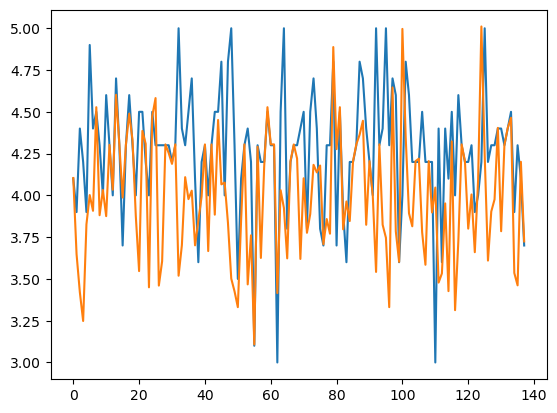

In [41]:
plt.plot(test['rating'].reset_index(drop=True))
plt.plot(pred_ans)

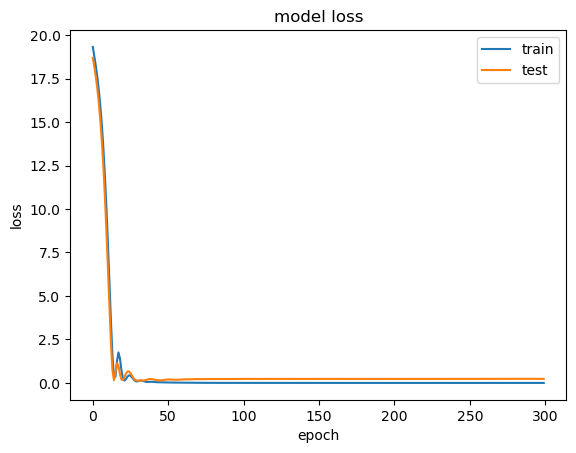

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [43]:
test_df

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
7,https://rukminim1.flixcart.com/image/312/312/x...,DELL Vostro Ryzen 3 Quad Core 5425U,36890,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,14.0,NaN,NaN,NaN
53,https://rukminim1.flixcart.com/image/312/312/x...,APPLE 2022 MacBook AIR M2,131990,Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,512 GB SSD,13.6,NaN,NaN,NaN
58,https://rukminim1.flixcart.com/image/312/312/x...,ASUS ZenBook Duo 14 (2021) Touch Panel Core i5...,74990,Intel Core i5 Processor (11th Gen),8 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,14.0,NaN,NaN,NaN
64,https://rukminim1.flixcart.com/image/312/312/x...,HP Pavilion Core i7 12th Gen,89990,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB SSD,14.0,NaN,NaN,NaN
72,https://rukminim1.flixcart.com/image/312/312/x...,MSI Core i9 13th Gen,399990,Intel Core i9 Processor (13th Gen),32 GB DDR5 RAM,Windows 11 Operating System,2 TB SSD,17.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
971,https://rukminim1.flixcart.com/image/312/312/x...,DELL Vostro Ryzen 3 Quad Core 5425U,36890,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,14.0,NaN,NaN,NaN
972,https://rukminim1.flixcart.com/image/312/312/x...,HP Envy x360 Creator OLED Intel Evo Core i5 12...,99999,Intel Core i5 Processor (12th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,NaN,NaN,NaN
975,https://rukminim1.flixcart.com/image/312/312/x...,MSI Vector GP66 Core i7 12th Gen,205000,Intel Core i7 Processor (12th Gen),16 GB DDR5 RAM,64 bit Windows 11 Operating System,1 TB SSD,17.3,NaN,NaN,NaN
977,https://rukminim1.flixcart.com/image/312/312/x...,DELL Core i5 11th Gen,67500,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,NaN,NaN,NaN


In [44]:
testing_df_sparse = ['img_link','name','processor','ram','os','storage']
testing_df_dense = ['price(in Rs.)','display(in inch)']

In [45]:
test_df[testing_df_dense] = mms.fit_transform(test_df[testing_df_dense])

C:\Users\user\AppData\Local\Temp\ipykernel_11580\2460983527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[testing_df_dense] = mms.fit_transform(test_df[testing_df_dense])


In [46]:
for feat in testing_df_sparse:
        lbe = LabelEncoder()
        test_df[feat] = lbe.fit_transform(test_df[feat])

C:\Users\user\AppData\Local\Temp\ipykernel_11580\503024792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[feat] = lbe.fit_transform(test_df[feat])


In [47]:
test_df

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
7,165,91,0.042250,1,13,1,7,0.421053,NaN,NaN,NaN
53,162,0,0.280000,11,17,3,10,0.350877,NaN,NaN,NaN
58,94,62,0.137500,18,16,1,10,0.421053,NaN,NaN,NaN
64,92,116,0.175000,24,0,1,3,0.421053,NaN,NaN,NaN
72,119,165,0.950000,31,8,5,5,0.947368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
971,165,91,0.042250,1,13,1,7,0.421053,NaN,NaN,NaN
972,204,105,0.200022,19,0,5,10,0.701754,NaN,NaN,NaN
975,189,173,0.462525,24,1,1,3,1.000000,NaN,NaN,NaN
977,134,72,0.118775,18,0,1,10,0.701754,NaN,NaN,NaN


In [48]:
test_fixlen_feature_columns = [SparseFeat(feat, test_df[feat].max() + 1, embedding_dim=4) for feat in testing_df_sparse] + [DenseFeat(feat, 1, ) for feat in testing_df_dense]

In [49]:
test_dnn_feature_columns = test_fixlen_feature_columns
test_linear_feature_columns = test_fixlen_feature_columns

In [50]:
test_feature_names = get_feature_names(test_linear_feature_columns + test_dnn_feature_columns)

In [51]:
test_feature_names

['img_link',
 'name',
 'processor',
 'ram',
 'os',
 'storage',
 'price(in Rs.)',
 'display(in inch)']

In [52]:
test.shape

(138, 11)

In [53]:
pred_y = {name: test_df[name] for name in feature_names}

In [54]:
pred_y['name']

7       91
53       0
58      62
64     116
72     165
      ... 
971     91
972    105
975    173
977     72
983      5
Name: name, Length: 296, dtype: int32

In [55]:
pred_y = model.predict(pred_y)

In [56]:
len(pred_y)

296

In [57]:
test_df['rating'] = pred_y

C:\Users\user\AppData\Local\Temp\ipykernel_11580\2911535597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['rating'] = pred_y


In [58]:
test_df

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
7,165,91,0.042250,1,13,1,7,0.421053,4.361341,NaN,NaN
53,162,0,0.280000,11,17,3,10,0.350877,5.010732,NaN,NaN
58,94,62,0.137500,18,16,1,10,0.421053,4.438873,NaN,NaN
64,92,116,0.175000,24,0,1,3,0.421053,4.771659,NaN,NaN
72,119,165,0.950000,31,8,5,5,0.947368,7.657041,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
971,165,91,0.042250,1,13,1,7,0.421053,4.361341,NaN,NaN
972,204,105,0.200022,19,0,5,10,0.701754,5.190451,NaN,NaN
975,189,173,0.462525,24,1,1,3,1.000000,7.101933,NaN,NaN
977,134,72,0.118775,18,0,1,10,0.701754,5.744850,NaN,NaN


In [59]:
training_df

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,292,271,0.142684,26,1,10,12,0.170940,4.5,14.0,1.0
1,320,277,0.065301,22,15,4,2,0.170940,4.4,53.0,3.0
2,242,56,0.103218,25,15,10,12,0.170940,4.4,4733.0,463.0
3,322,72,0.054645,21,15,4,12,0.170940,4.3,10406.0,1040.0
4,328,234,0.009107,1,11,7,10,0.102564,3.8,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
978,100,11,0.018215,18,12,6,12,0.102564,3.8,1135.0,167.0
979,89,73,0.066788,21,15,3,0,0.170940,4.0,1907.0,227.0
980,104,187,0.020279,45,13,6,0,0.000000,3.8,5991.0,687.0
981,300,42,0.118397,6,15,10,12,0.102564,4.5,22.0,5.0


In [60]:
df_new = pd.concat([test_df, training_df], axis = 0)

In [61]:
df_new = df_new.sort_index()

In [62]:
df_new

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,292,271,0.142684,26,1,10,12,0.170940,4.500000,14.0,1.0
1,320,277,0.065301,22,15,4,2,0.170940,4.400000,53.0,3.0
2,242,56,0.103218,25,15,10,12,0.170940,4.400000,4733.0,463.0
3,322,72,0.054645,21,15,4,12,0.170940,4.300000,10406.0,1040.0
4,328,234,0.009107,1,11,7,10,0.102564,3.800000,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
979,89,73,0.066788,21,15,3,0,0.170940,4.000000,1907.0,227.0
980,104,187,0.020279,45,13,6,0,0.000000,3.800000,5991.0,687.0
981,300,42,0.118397,6,15,10,12,0.102564,4.500000,22.0,5.0
982,148,147,0.075896,22,15,4,2,0.170940,4.000000,801.0,104.0
